In [1]:
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2

In [2]:
def showIMG(img):
    if len(img.shape)==2:
        plt.imshow(img,cmap="gray")
    else:
        plt.imshow(img[:,:,::-1])

In [3]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [4]:
image = cv2.imread("images/example_02.png")

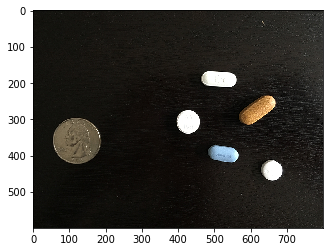

In [5]:
showIMG(image)

In [6]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray,(7,7),0)

edged = cv2.Canny(blurred,50,100)
edged = cv2.dilate(edged,None,iterations=1)
edged = cv2.erode(edged,None,iterations=1)

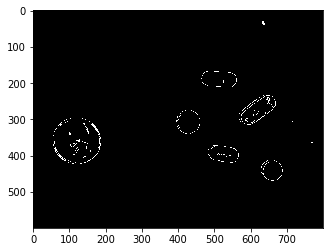

In [7]:
showIMG(edged)

In [8]:
cnts = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts,_) = contours.sort_contours(cnts)
ppm = None

In [9]:
orig = image.copy()
for cnt in cnts:
    if cv2.contourArea(cnt) < 100:
        continue
    
    box = cv2.minAreaRect(cnt)
    box = cv2.cv.Boxpoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box,dtype="int")
    
    box = perspective.order_points(box)
    cv2.drawContours(orig,[box.astype("int")],-1,(0,255,0),2)
    
    for x,y in box:
        cv2.circle(orig,(int(x),int(y)),5,(0,0,255),-1)
    
    (tl,tr,br,bl) = box
    (tltrX,tltrY) = midpoint(tl,tr)
    (blbrX,blbrY) = midpoint(bl,br)
    (tlblX,tlblY) = midpoint(tl,bl)
    (trbrX,trbrY) = midpoint(tr,br)
    
    cv2.circle(orig, (int(tltrX),int(tltrY)), 5, (255,255,0), -1)
    cv2.circle(orig, (int(blbrX),int(blbrY)), 5, (255,255,0), -1)
    cv2.circle(orig, (int(tlblX),int(tlblY)), 5, (255,255,0), -1)
    cv2.circle(orig, (int(trbrX),int(trbrY)), 5, (255,255,0), -1)
    
    cv2.line(orig, (int(tltrX),int(tltrY)), (int(blbrX),int(blbrY)), (255,0,255), 2)
    cv2.line(orig, (int(tlblX),int(tlblY)), (int(trbrX),int(trbrY)), (255,0,255), 2)
    
    dA = dist.euclidean((tltrX,tltrY),(blbrX,blbrY))
    dB = dist.euclidean((tlblX,tlblY),(trbrX,trbrY))
    
    if ppm is None:
        ppm = dB/0.955
    
    dimA = dA/ppm
    dimB = dB/ppm
    
    cv2.putText(orig,"{:.1f}in".format(dimA),(int(tltrX - 15),int(tltrY - 10)),cv2.FONT_HERSHEY_SIMPLEX,0.65,(255,255,255),2)
    cv2.putText(orig,"{:.1f}in".format(dimB),(int(trbrX + 15),int(trbrY)),cv2.FONT_HERSHEY_SIMPLEX,0.65,(255,255,255),2)

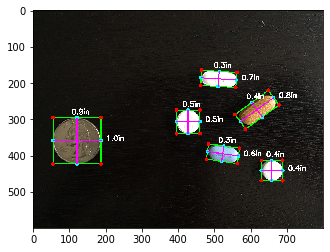

In [10]:
showIMG(orig)